In [32]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_json('../data/TSXData.json')

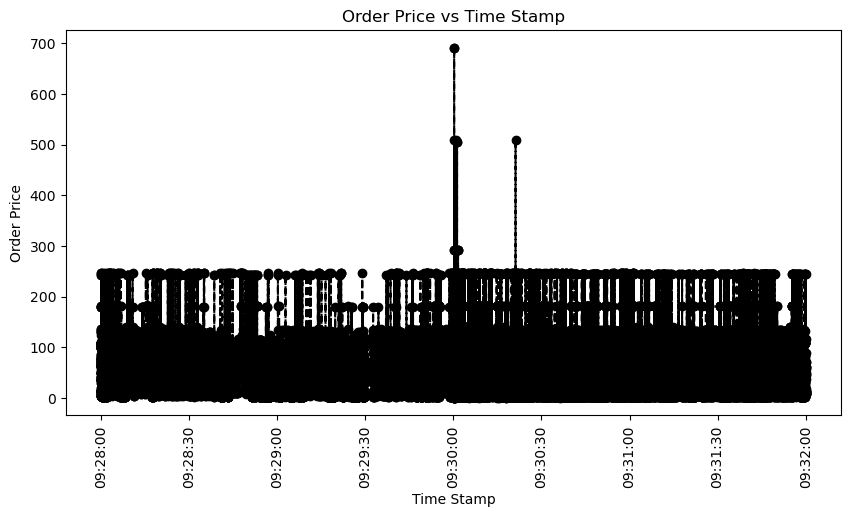

In [33]:
# Get data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data = df[df.MessageType=='NewOrderAcknowledged'][['OrderPrice', 'TimeStamp']]
# Plot order price against time stamp
plt.plot(data.TimeStamp, data.OrderPrice, '--o', color='k')
plt.title('Order Price vs Time Stamp')
plt.xlabel('Time Stamp')
plt.ylabel('Order Price')
plt.xticks(rotation=90)
plt.show()

In [34]:
df.columns

Index(['TimeStamp', 'TimeStampEpoch', 'Direction', 'OrderID', 'MessageType',
       'Symbol', 'OrderPrice', 'Exchange'],
      dtype='object')

In [35]:
df.head()

,TimeStamp,TimeStampEpoch,Direction,OrderID,MessageType,Symbol,OrderPrice,Exchange
0,2023-01-06 09:28:00.011058962,2023-01-06 14:28:00.011058962,NBFToExchange,b963bbc8-9283-11ed-9ad4-047c16291a22,NewOrderRequest,OA14Y,61.56,TSX
1,2023-01-06 09:28:00.011081372,2023-01-06 14:28:00.011081372,NBFToExchange,b963bbc9-9283-11ed-8b08-047c16291a22,NewOrderRequest,OOOTO,69.37,TSX
2,2023-01-06 09:28:00.011117286,2023-01-06 14:28:00.011117286,ExchangeToNBF,b963bbc8-9283-11ed-9ad4-047c16291a22,NewOrderAcknowledged,OA14Y,61.56,TSX
3,2023-01-06 09:28:00.011125452,2023-01-06 14:28:00.011125452,NBFToExchange,b963bbca-9283-11ed-b19f-047c16291a22,CancelRequest,OA14Y,NaN,TSX
4,2023-01-06 09:28:00.011129285,2023-01-06 14:28:00.011129285,NBFToExchange,b963bbcb-9283-11ed-aba1-047c16291a22,NewOrderRequest,NQGAH,73.20,TSX
